In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# reading in data set

speed, ammo, result = [], [], []
with open(r"C:\Users\gamru\OneDrive\Desktop\Q7 zombies_data - Sheet1.csv", "r") as f:
    next(f)
    for line in f:
        rowlist = line.strip().split(',')
        speed.append(float(rowlist[0]))
        ammo.append(int(rowlist[1]))
        result.append(int(rowlist[2]))

X = np.column_stack([np.array(speed), np.array(ammo)])
y = np.array(result).reshape(len(result), 1)
print(X.shape)
print(y.shape)

(22, 2)
(22, 1)


In [3]:
# Implementing Gradient Descent

class BiClassifier:

    def __init__(self, learning_rate, iterations, noof_features):
        self.alpha = learning_rate
        self.epochs = iterations
        self.n = noof_features
        self.w = np.zeros((self.n, 1))
        self.b = 3.14

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def predict(self, X):
        return self.sigmoid((X @ self.w) + self.b)
    
    def train(self, X, y):
        m = X.shape[0]
        y = np.array(result).reshape(-1, 1)
        for i in range(self.epochs):
            yhat = self.predict(X)
            decrmnt = X.T @ (yhat - y)
            self.w -= self.alpha * decrmnt / m
            self.b -= self.alpha * np.mean(yhat - y)
        print("Training successful, final parameters :")
        print(f"weights : {list(self.w.flatten())}")
        print(f"bias    : {self.b}")
        return [float(self.w[0]), float(self.w[1]), float(self.b)]


In [4]:
model = BiClassifier(0.01, 100000, 2)
[w0, w1, b] = model.train(X, y)

Training successful, final parameters :
weights : [np.float64(0.8668019263648088), np.float64(2.08916519521667)]
bias    : -17.326513449920995


C:\Users\gamru\AppData\Local\Temp\ipykernel_33300\2467451720.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return [float(self.w[0]), float(self.w[1]), float(self.b)]


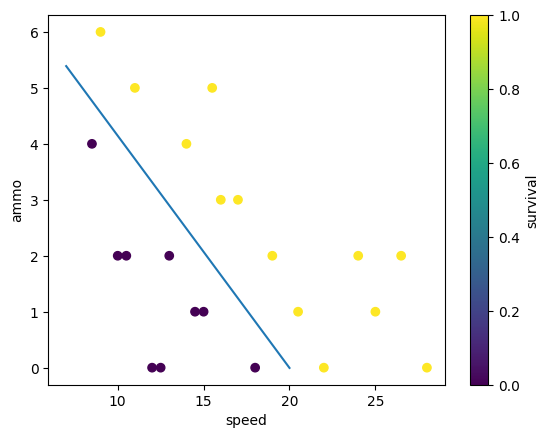

In [5]:
plt.scatter(speed, ammo, c = result)
plt.xlabel("speed")
plt.ylabel("ammo")
plt.colorbar(label = 'survival')

# to plot the decision line :
# w[0] speed + w[1] ammo + b = 0
fit_x = np.array([7, 10, 15, 20])
fit_y = - (b + w0*fit_x) / w1
plt.plot(fit_x, fit_y)

plt.show()

In [6]:
# prediction for speed = 25, ammo = 1

print(model.predict([[25, 1]]))

[[0.99839448]]


Training successful, final parameters :
weights : [np.float64(0.0), np.float64(0.0)]
bias    : 3.14
Training successful, final parameters :
weights : [np.float64(0.1068516041595349), np.float64(0.3890245900821757)]
bias    : -1.827140887952139


C:\Users\gamru\AppData\Local\Temp\ipykernel_33300\2467451720.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return [float(self.w[0]), float(self.w[1]), float(self.b)]


Training successful, final parameters :
weights : [np.float64(0.23832730085593665), np.float64(0.6907621718499792)]
bias    : -4.6148292317819894
Training successful, final parameters :
weights : [np.float64(0.397345578967053), np.float64(1.050584273163443)]
bias    : -7.890119700579076
Training successful, final parameters :
weights : [np.float64(0.7024834829863088), np.float64(1.7264206758016596)]
bias    : -14.038375030333547
Training successful, final parameters :
weights : [np.float64(0.8318225102553733), np.float64(2.0118556357595296)]
bias    : -16.62693742932349


C:\Users\gamru\AppData\Local\Temp\ipykernel_33300\2454660228.py:25: RuntimeWarning: divide by zero encountered in divide
  fit_y = - (wb[i][2] + wb[i][0]*fit_x) / wb[i][1]


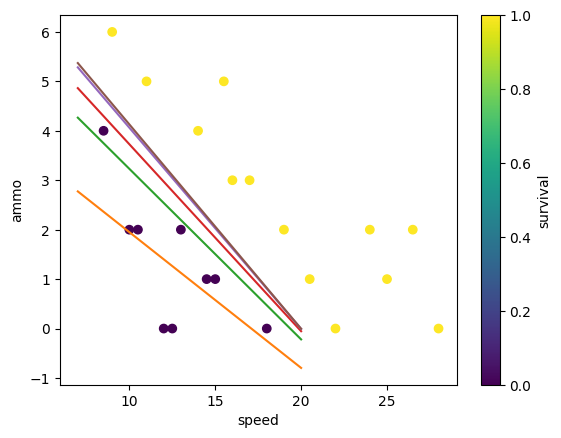

In [7]:
# visualising cost dropping

plt.scatter(speed, ammo, c = result)
plt.xlabel("speed")
plt.ylabel("ammo")
plt.colorbar(label = 'survival')

model_0 = BiClassifier(0.01, 0, 2)
model_1 = BiClassifier(0.01, 5000, 2)
model_2 = BiClassifier(0.01, 10000, 2)
model_3 = BiClassifier(0.01, 20000, 2)
model_4 = BiClassifier(0.01, 60000, 2)
model_5 = BiClassifier(0.01, 90000, 2)

wb = []
wb.append(list(model_0.train(X, y)))
wb.append(list(model_1.train(X, y)))
wb.append(list(model_2.train(X, y)))
wb.append(list(model_3.train(X, y)))
wb.append(list(model_4.train(X, y)))
wb.append(list(model_5.train(X, y)))

for i in range(6):
    fit_x = np.array([7, 10, 15, 20])
    fit_y = - (wb[i][2] + wb[i][0]*fit_x) / wb[i][1]
    plt.plot(fit_x, fit_y)

plt.show()